In [3]:
import numpy as np
import pandas as pd
import seaborn as snss
import matplotlib.pyplot as plt

In [4]:
def load_data(filepath,filename):
  df = pd.read_csv("/content/drive/MyDrive/" + filepath + filename)
  return df

In [5]:
df_fl_sd = load_data('Shutdown/',"FL_shutdown_sentiment.csv")
df_oh_sd = load_data('Shutdown/',"OH_shutdown_sentiment.csv")
df_fl_ro = load_data('Reopen/',"FL_reopen_sentiment.csv")
df_oh_ro = load_data('Reopen/',"OH_reopen_sentiment.csv")
df_oh_ro.head(1)

,date,username,to,text,retweets,favorites,replies,id,permalink,author_id,hashtags,mentions,geo,urls,city,query,date_range,state,month,day,sentiment_analysis,neg_score,neu_score,pos_score,compound_score,month_day_hour
0,2020-05-08 20:00:12-04:00,oppie_71,chrissyteigen,"Hugs hunny, the food world is a mother fucker,...",0,0,0,1258909600323076098,https://twitter.com/oppie_71/status/1258909600...,371934691,NaN,NaN,NaN,NaN,columbus,get OR one OR time OR people OR day OR know OR...,"('2020-05-09', '2020-05-16')",OH,5,9,"{'neg': 0.094, 'neu': 0.655, 'pos': 0.251, 'co...",0.094,0.655,0.251,0.8016,50820


In [6]:
def sentiment_pred(dataframe):
  sentiment_list = []
  for i in dataframe['compound_score']:
    if i >= 0.05:
      sentiment_list.append('Positive')
    if i <= -0.05:
      sentiment_list.append('Negative')
    if i < 0.05 and i > -0.05:
      sentiment_list.append('Neutral')
  return sentiment_list    

In [7]:
def preprocessing_df(dataframe):
  sentiments_list = sentiment_pred(dataframe)
  dataframe['sentiment'] = sentiments_list
  df = dataframe[['username', 'text', 'date', 'city', 'state', 'month', 'day','sentiment']]
  df['date'] = pd.to_datetime(df['date'], utc=True)
  df['ymd'] = df['date'].dt.date
  return df

In [8]:
df_shutdown_fl = preprocessing_df(df_fl_sd)
df_shutdown_oh = preprocessing_df(df_oh_sd)
df_reopen_fl = preprocessing_df(df_fl_ro)
df_reopen_oh = preprocessing_df(df_oh_ro)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
def plt_tweets_perday(dataframe,sentiment,status,num):
    x = sorted(dataframe['ymd'].value_counts().index) # Sorted dates
    #y = dataframe.groupby('ymd').count()['text'] # Num tweets per day
    y = dataframe[dataframe['sentiment'] == sentiment]
    grouped_y = y.groupby(['ymd']).count()['text']

    plt.figure(figsize=(15, 10))
    sns.scatterplot(x, grouped_y, s=50, marker='o', color='darkred', zorder=3)
    sns.lineplot(x, grouped_y, color='red', linewidth=2.2)
    plt.axvline(x[num], color='blue') # 3rd day of search is the announcement date
    plt.title(f'Tweets Per Day in {dataframe["state"][0]} Surrounding Covid {status} Date with {sentiment} sentiment')
    #plt.xticks(rotation=40)
    plt.ylabel('Number of Tweets')
    plt.legend(labels=['_', 'Date Reopen announced'])
    plt.xlabel('Date')
    plt.savefig(f'/content/drive/MyDrive/Reopen/tweets_per_day_{dataframe["state"][0]}_reopen_{sentiment}', dpi=150);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f73789c0b10> has a label of '_' which cannot be automatically added to the legend.
  


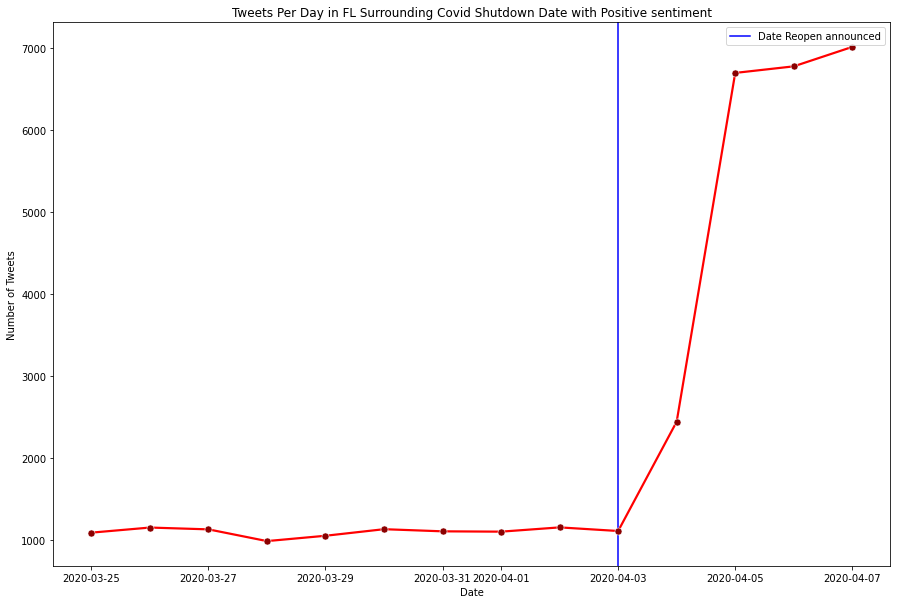

In [12]:
plt_tweets_perday(df_shutdown_fl,'Positive','Shutdown',9)
#plt_tweets_perday(df_shutdown_OH,'Neutral',4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f737894c650> has a label of '_' which cannot be automatically added to the legend.
  


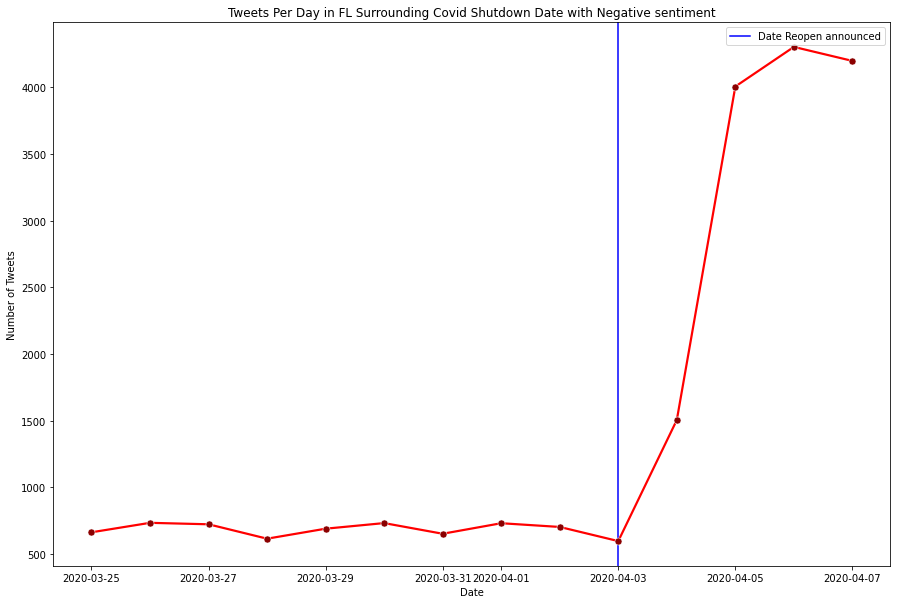

In [13]:
plt_tweets_perday(df_shutdown_fl,'Negative','Shutdown',9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f73788dc090> has a label of '_' which cannot be automatically added to the legend.
  


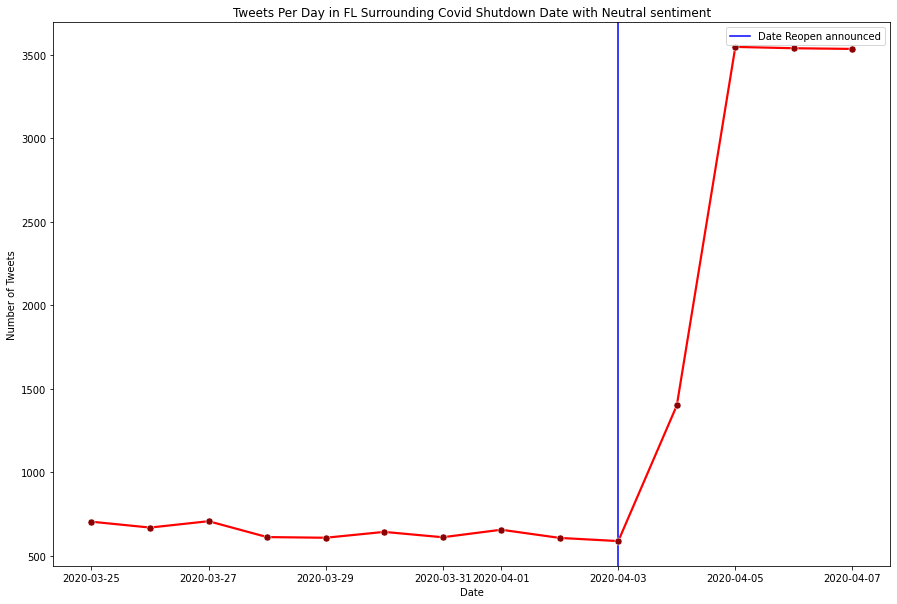

In [14]:
plt_tweets_perday(df_shutdown_fl,'Neutral','Shutdown',9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f737892cc90> has a label of '_' which cannot be automatically added to the legend.
  


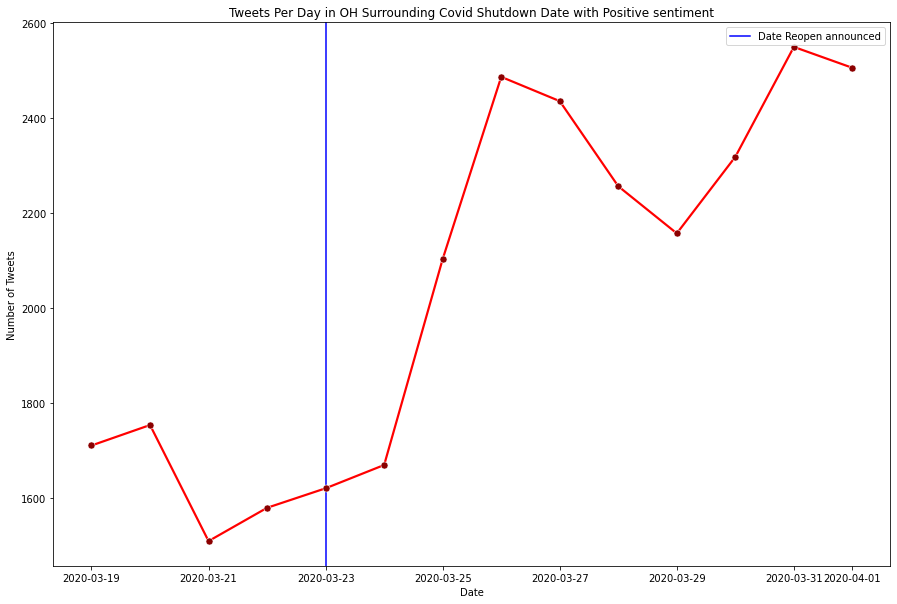

In [15]:
plt_tweets_perday(df_shutdown_oh,'Positive','Shutdown',4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f73816ce150> has a label of '_' which cannot be automatically added to the legend.
  


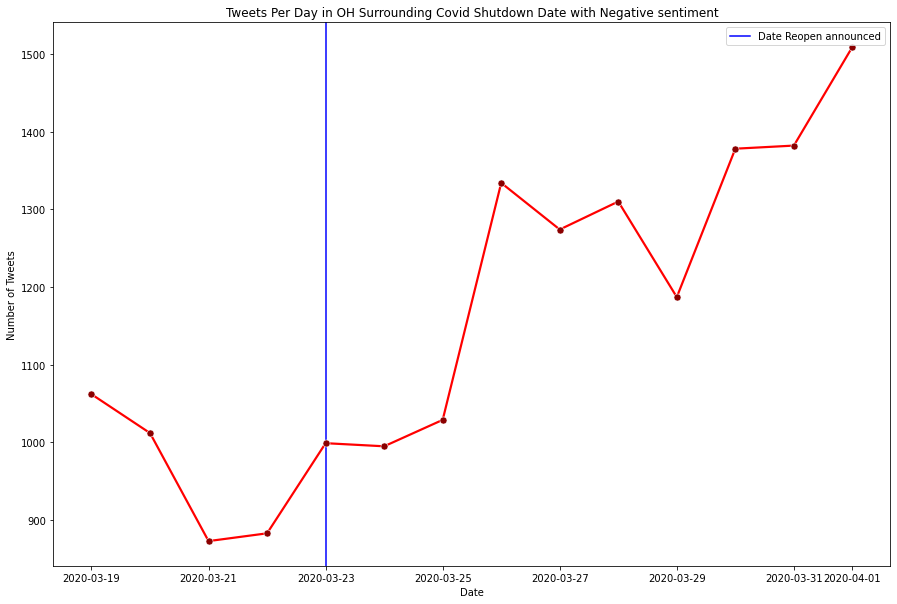

In [16]:
plt_tweets_perday(df_shutdown_oh,'Negative','Shutdown',4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f737893ae90> has a label of '_' which cannot be automatically added to the legend.
  


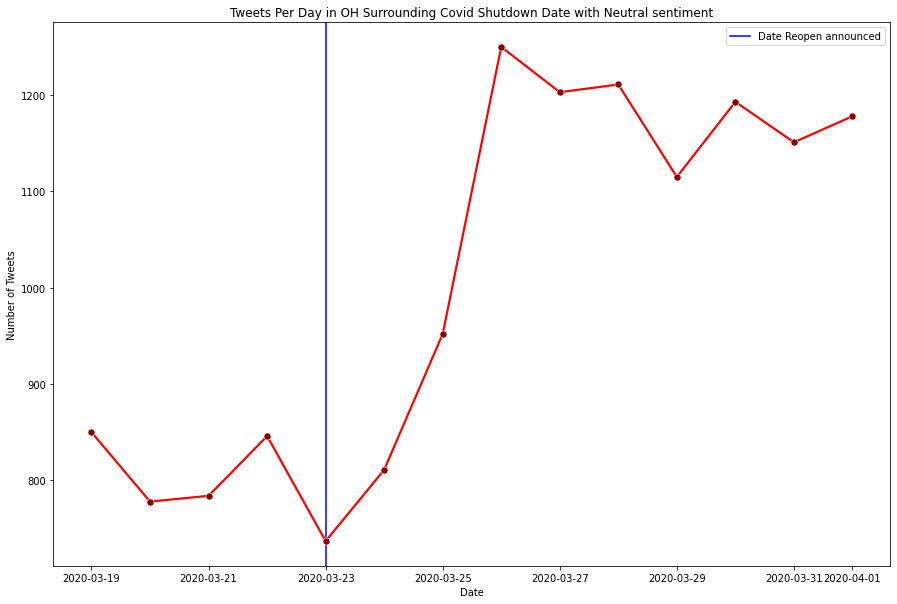

In [17]:
plt_tweets_perday(df_shutdown_oh,'Neutral','Shutdown',4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f7378924550> has a label of '_' which cannot be automatically added to the legend.
  


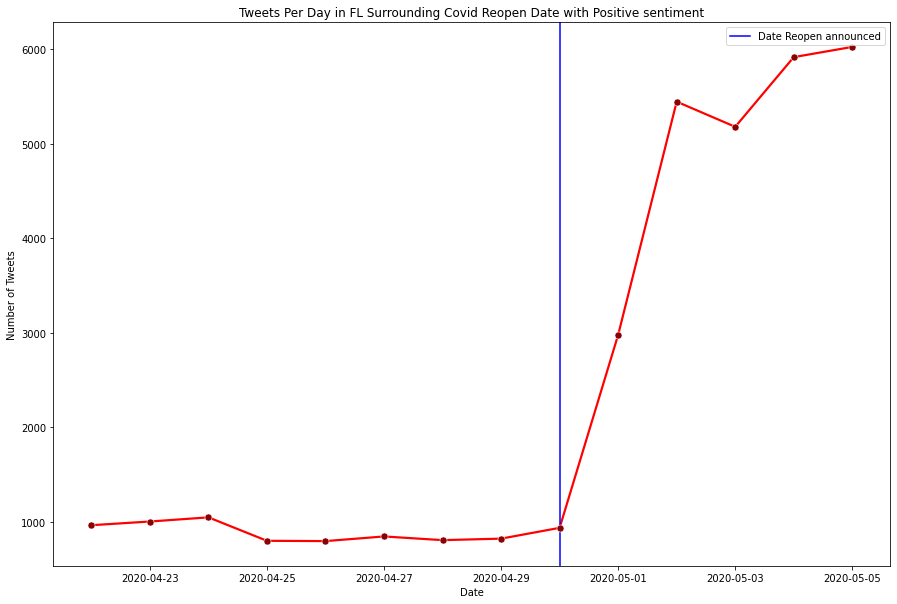

In [18]:
plt_tweets_perday(df_reopen_fl,'Positive','Reopen',8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f737884ea10> has a label of '_' which cannot be automatically added to the legend.
  


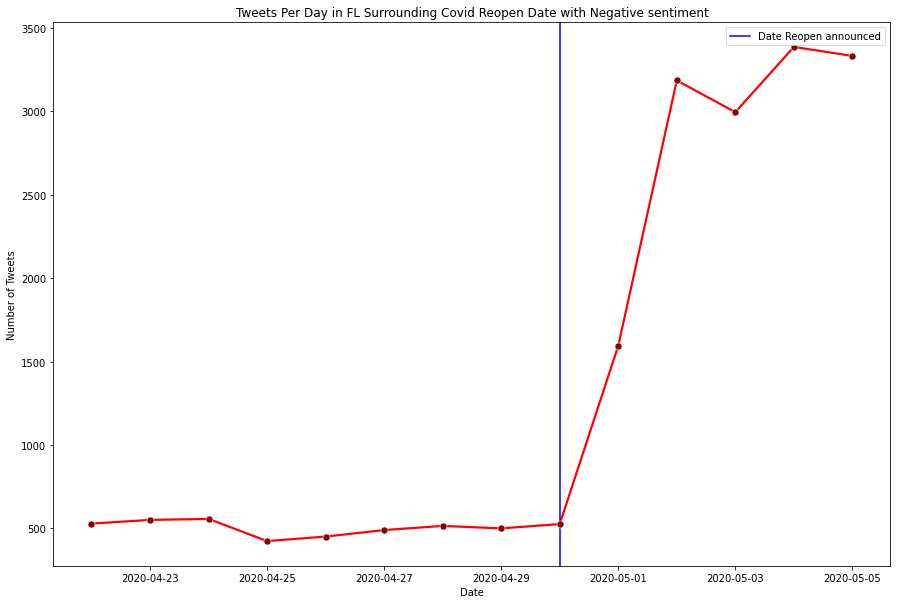

In [19]:
plt_tweets_perday(df_reopen_fl,'Negative','Reopen',8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f73787b5cd0> has a label of '_' which cannot be automatically added to the legend.
  


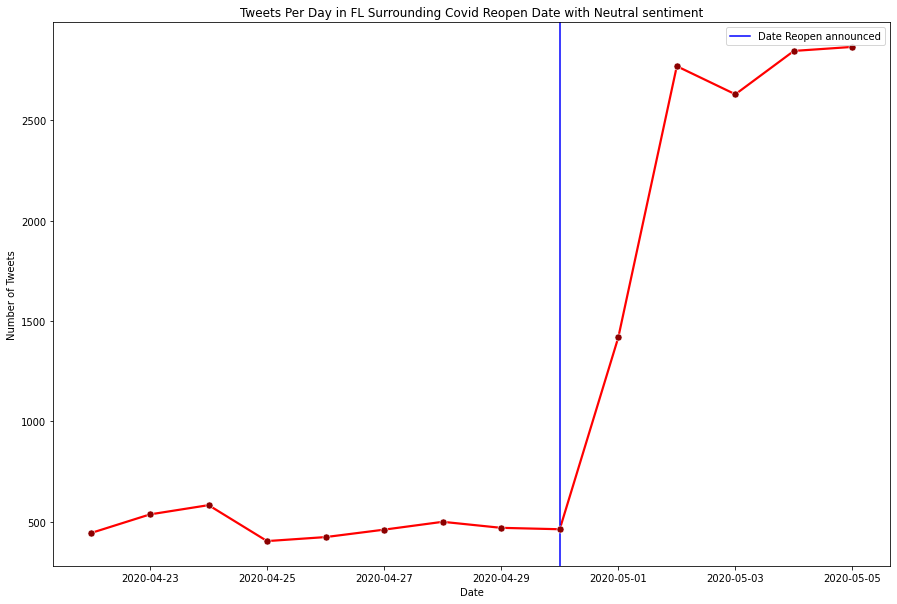

In [20]:
plt_tweets_perday(df_reopen_fl,'Neutral','Reopen',8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f737873b5d0> has a label of '_' which cannot be automatically added to the legend.
  


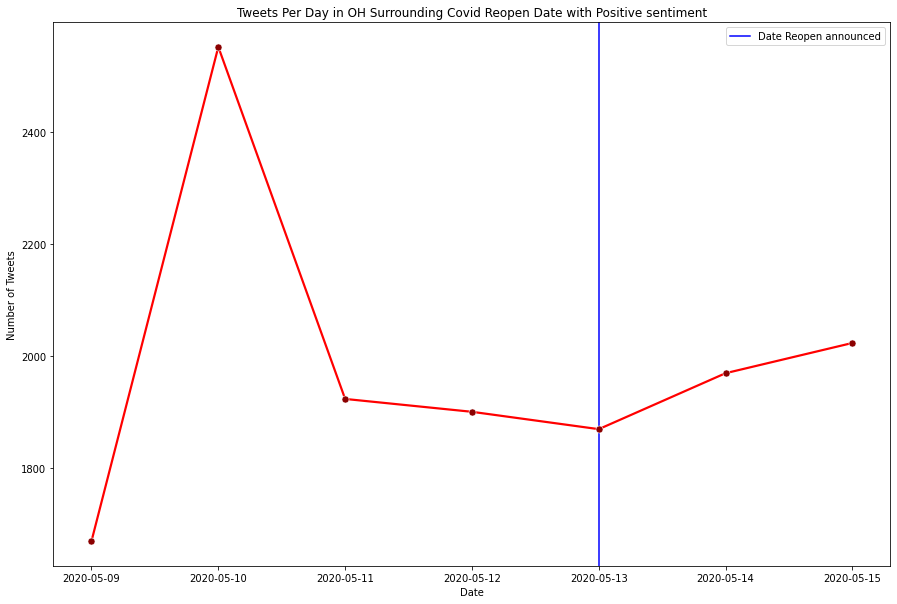

In [21]:
plt_tweets_perday(df_reopen_oh,'Positive','Reopen',4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f7378729910> has a label of '_' which cannot be automatically added to the legend.
  


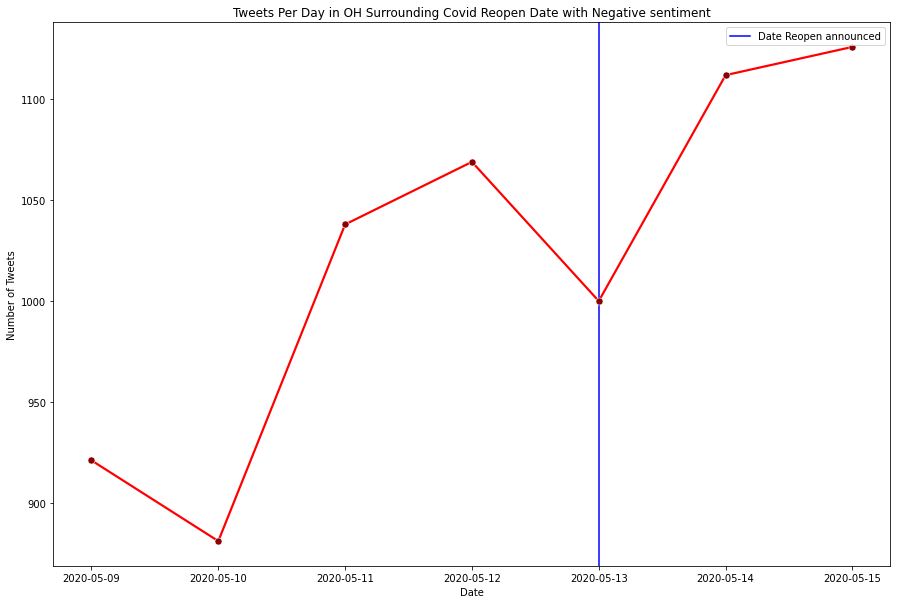

In [22]:
plt_tweets_perday(df_reopen_oh,'Negative','Reopen',4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f737863fc90> has a label of '_' which cannot be automatically added to the legend.
  


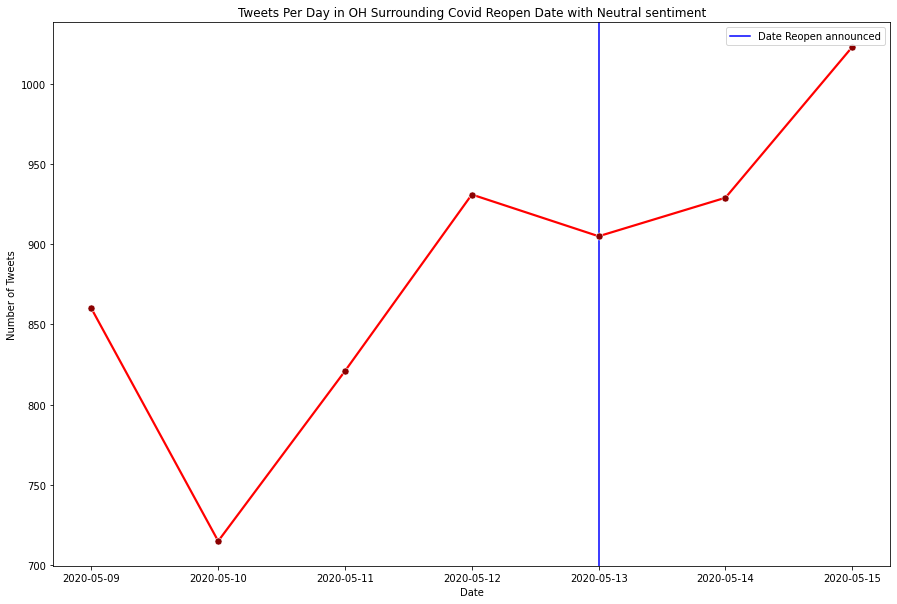

In [23]:
plt_tweets_perday(df_reopen_oh,'Neutral','Reopen',4)

In [24]:
def top_tweeting_cities(dataframe):
  f, ax = plt.subplots(figsize=(15, 10))
  sns.set_color_codes("pastel")
  x = dataframe['city'].value_counts().index
  y = sorted(dataframe.groupby('city').count()['text'],reverse = True)
  plt.title(f'Top tweeting cities in {dataframe["state"][0]}')
  plt.ylabel('Cities')
  plt.xlabel('Number of Tweets')
  sns.barplot(y[:9],x[:9],
            label="Top tweeting cities", color="b",orient = 'h')
  plt.savefig(f'/content/drive/MyDrive/Shutdown/top_tweeting_{dataframe["state"][0]}', dpi=150)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


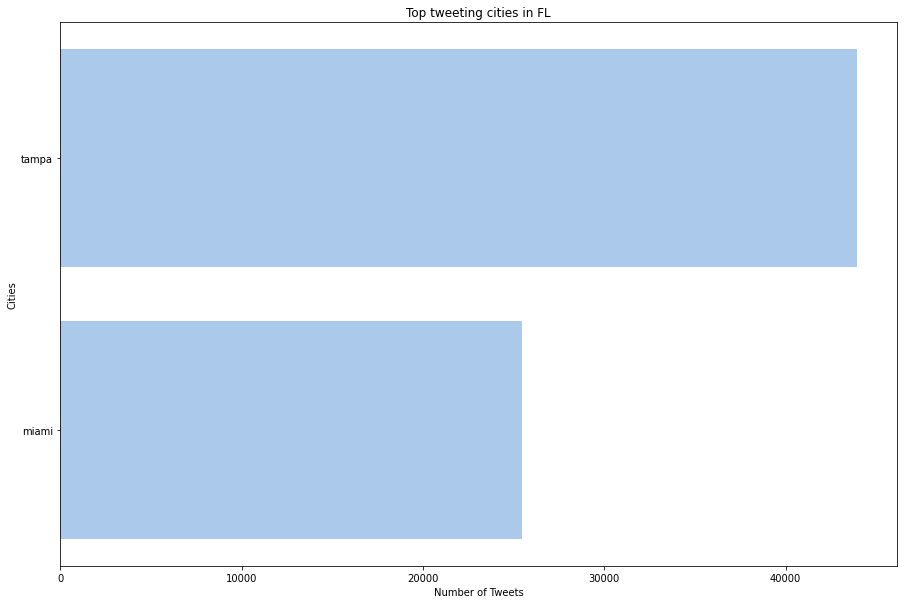

In [26]:
top_tweeting_cities(df_reopen_fl)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


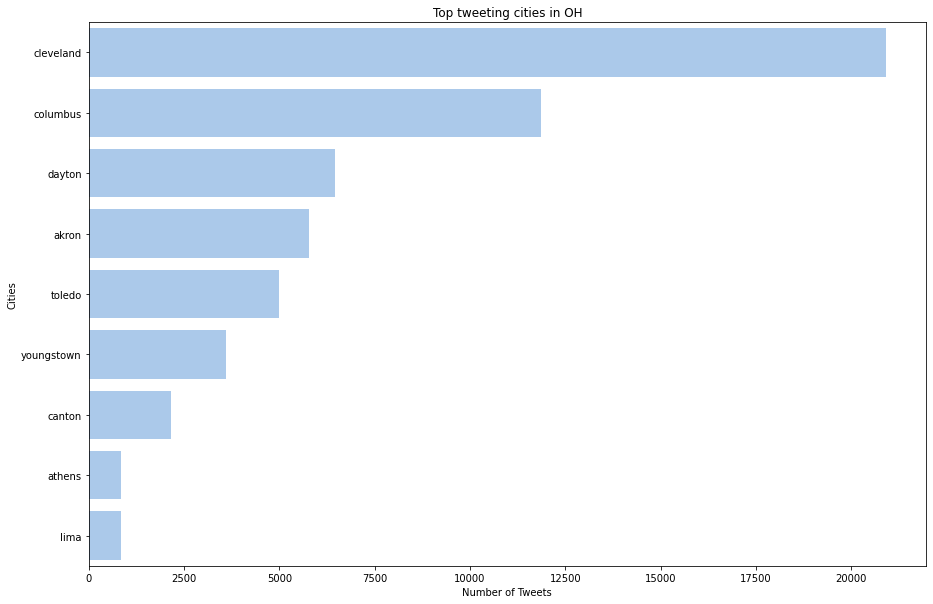

In [27]:
top_tweeting_cities(df_shutdown_oh)